In [2]:
import cv2 # pip install opencv-python

In [3]:
import matplotlib.pyplot as plt # pip install matplotlib

In [4]:
# Need to download config and model file from opencv wiki through github
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [6]:
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classLabels))

80


In [9]:
model.setInputSize(320, 320)
model.setInputScale(1.0/127.5) # 255/2 = 127.5
model.setInputMean((127.5, 127.5, 127.5)) # mobilenet -> [-1,1]
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f9200c259d0>

# Read on image

In [10]:
img = cv2.imread('cat_and_dog.png')

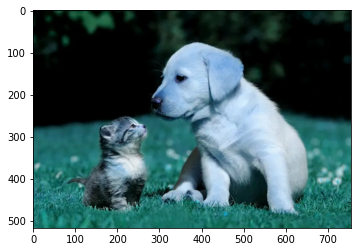

In [11]:
plt.imshow(img) 

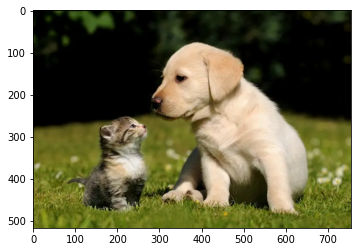

In [12]:
# BGR to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
classIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [14]:
print(classIndex)
print(confidence)
print(bbox)

[18 17]
[0.74988216 0.6741422 ]
[[297  81 353 391]
 [ 85 247 188 229]]


In [15]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classIdx, conf, box in zip(classIndex, confidence, bbox):
    cv2.rectangle(img, box, (255, 0, 0), 2)
    cv2.putText(img, classLabels[classIdx-2], (box[0]+10, box[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

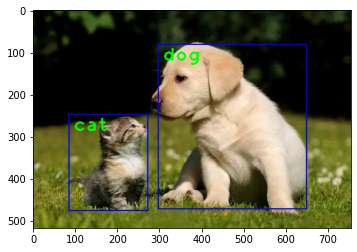

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video Demo

In [51]:
cap = cv2.VideoCapture("car-detection.mp4")

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(classIndex)
    if (len(classIndex) != 0):
        for classIdx, conf, box in zip(classIndex, confidence, bbox):
            if (classIdx <= 80):
                cv2.rectangle(frame, box, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[classIdx-1], (box[0]+10, box[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
                
    cv2.imshow("Object Detection Tuturial", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[14]
()
[77]
[77]
()
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77]
[77  6]
[77  6]
[ 6 77]
[77  6]
[ 6 77]
[ 6 77]
[ 6 77]
[ 6 77]
[77  6]
[77]
[6]
()
()
[3]
[3]
[3]
[3]
[3]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[14]
()
[14]
[33]
()
[33]
[33]
[77 33]
[77]
[77]
[77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77 77]
[77]
()
()
()
()
[3]
()
()
[3]
[3]
[3]
()
[3]
()
[3]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
(

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [52]:
cap = cv2.VideoCapture(1)

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(classIndex)
    if (len(classIndex) != 0):
        for classIdx, conf, box in zip(classIndex, confidence, bbox):
            if (classIdx <= 80):
                cv2.rectangle(frame, box, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[classIdx-1], (box[0]+10, box[1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)
                
    cv2.imshow("Object Detection Tuturial", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[1]
[1]
[ 1 73]
[1]
[ 1 44]
[1]
[1]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[1]
[1]
[1]
[ 1 73]
[1]
[ 1 44]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 72 44]
[1]
[ 1 72]
[ 1 44]
[ 1 44]
[ 1 44]
[ 1 72]
[ 1 72]
[ 1 72 44]
[ 1 72]
[ 1 44 72]
[ 1 72]
[ 1 72]
[ 1 72 72]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 44 44]
[1]
[ 1 44]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 72]
[1]
[1]
[1]
[ 1 72]
[ 1 72]
[ 1 72 73]
[ 1 73 72]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[ 1 73]
[1]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[ 1 77]
[77  1]
[ 1 77]
[ 1 77]
[ 1 77 44]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 77]
[ 1 44]
[1]
[ 1 77]
[1]
[1]
[ 1 44]
[1]
[ 1 44]
[1]
[1]
[1]
[1 1]
[1